# Etude du dataset BankChurned

### - il est question de pouvoir predire si un client va se desabonné à la banque ou pas
### - pour plus de description suivez le lien suivant : 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BankChurners.csv', index_col='CLIENTNUM')
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Exploratory Data Analysis

In [3]:
data.shape

(10127, 20)

In [4]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
(data.isna().sum()/data.shape[0]).sort_values()

Attrition_Flag              0.0
Total_Trans_Ct              0.0
Total_Trans_Amt             0.0
Total_Amt_Chng_Q4_Q1        0.0
Avg_Open_To_Buy             0.0
Total_Revolving_Bal         0.0
Credit_Limit                0.0
Contacts_Count_12_mon       0.0
Months_Inactive_12_mon      0.0
Total_Relationship_Count    0.0
Months_on_book              0.0
Card_Category               0.0
Income_Category             0.0
Marital_Status              0.0
Education_Level             0.0
Dependent_count             0.0
Gender                      0.0
Customer_Age                0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### notre dataset n'a aucune valeur manquantes

In [6]:
target = "Attrition_Flag"

In [7]:
data[target].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcccf6dcd90>,
      dtype=object)

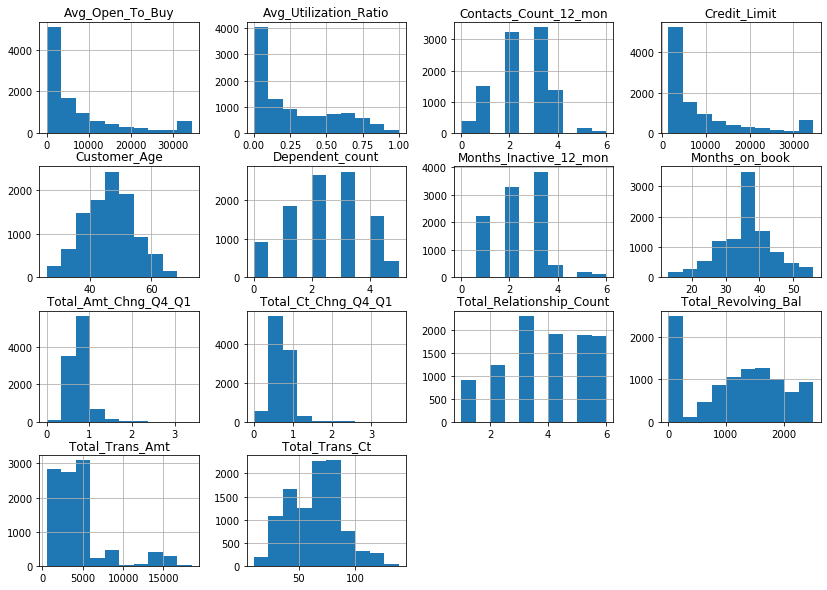

In [92]:
data.hist(figsize=(14,10))

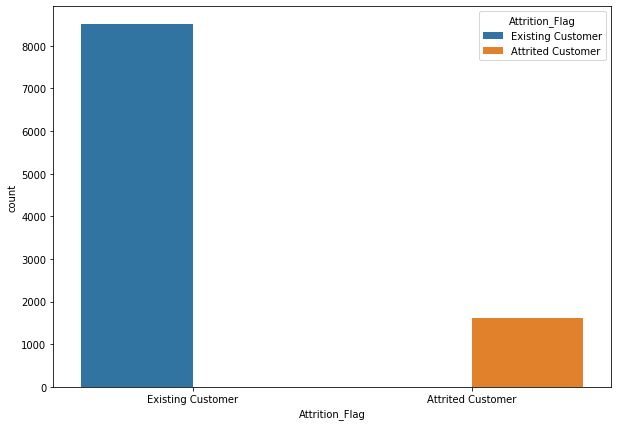

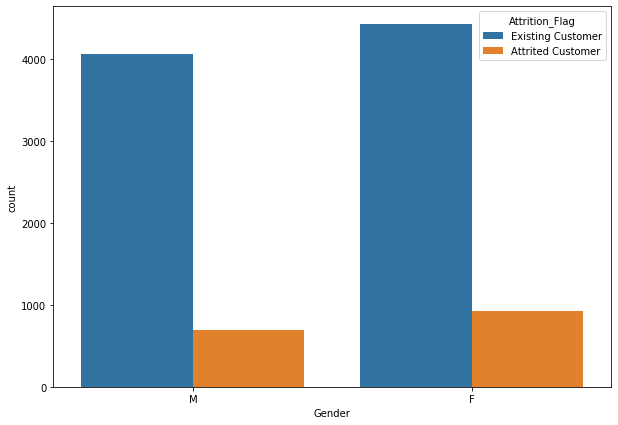

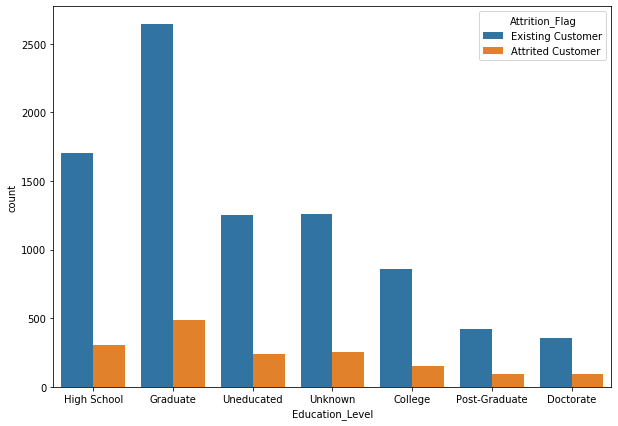

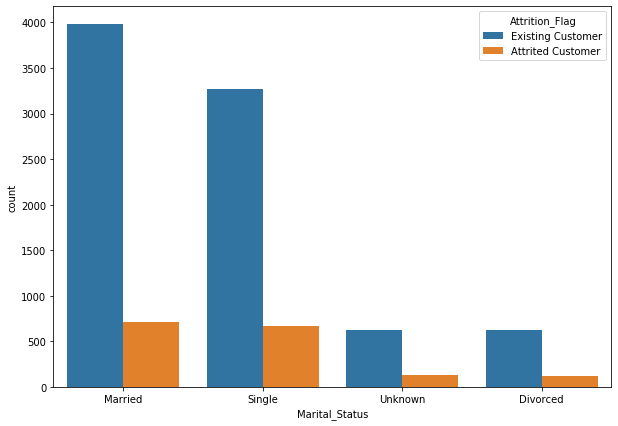

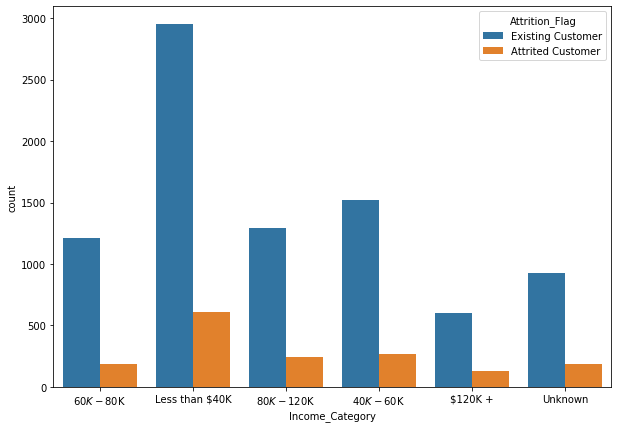

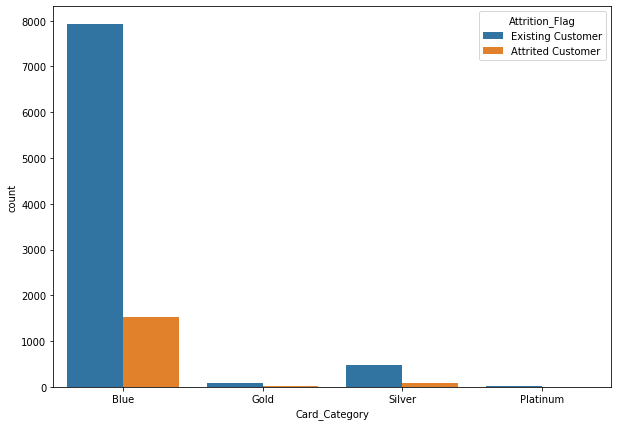

In [36]:
for col in data.select_dtypes(exclude=[np.number]).columns:
    plt.figure(figsize=(10,7))
    sns.countplot(data=data, x=f'{col}', hue=y)

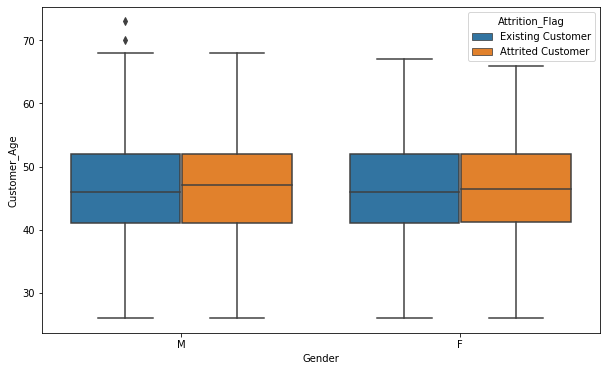

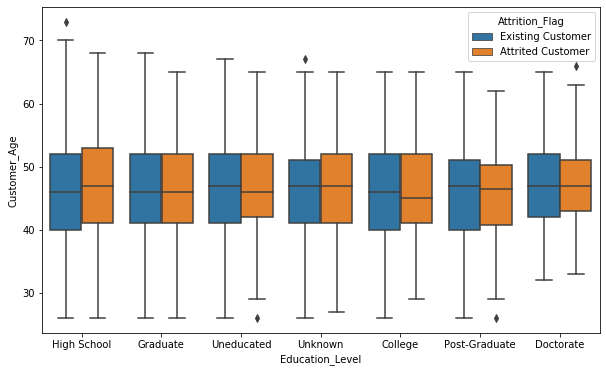

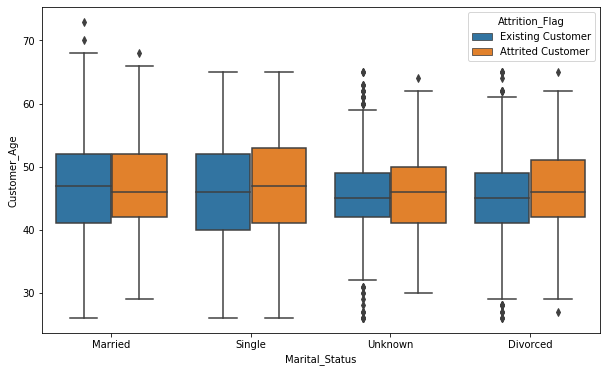

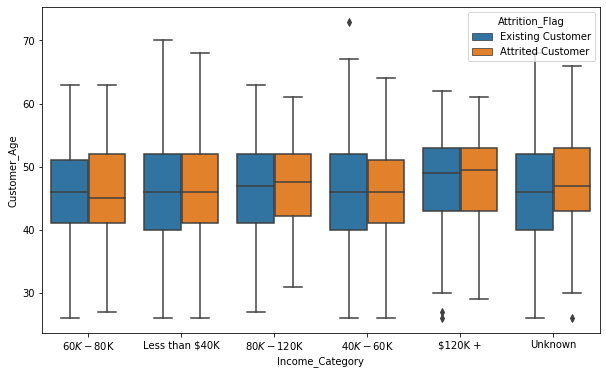

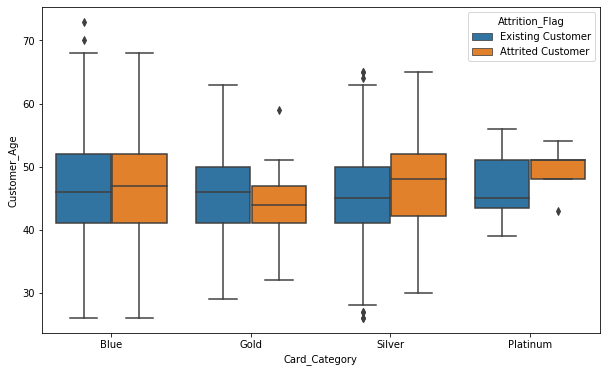

In [37]:
for col in categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=data, x=f'{col}', y='Customer_Age', hue=y)

#### Remarque
- L'age du client n'a pas un impact sur le fait qu'il se desabonne ou pas

# Visualisation Target/Variables

- pour mieux comprendre nos données

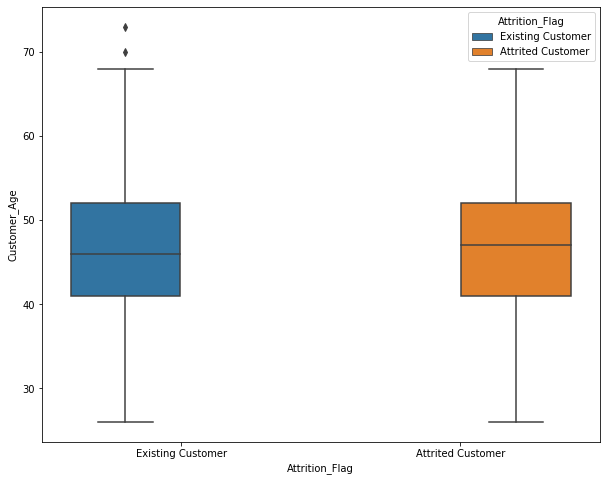

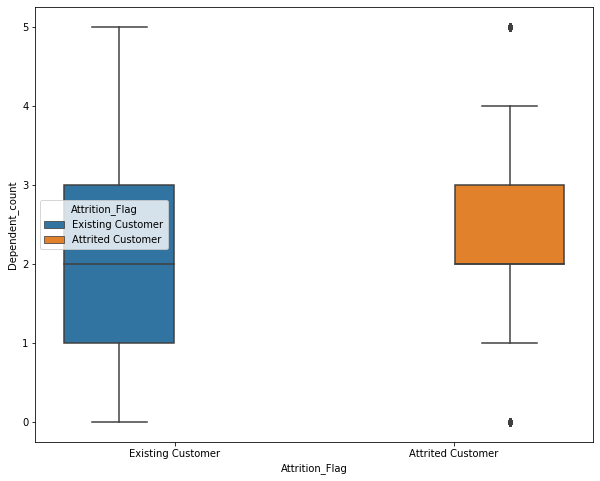

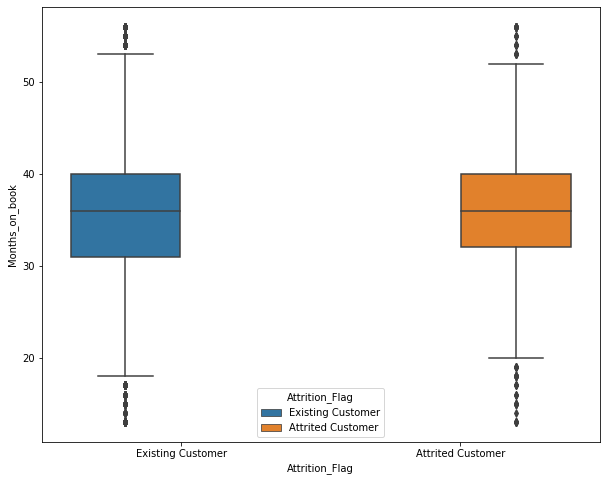

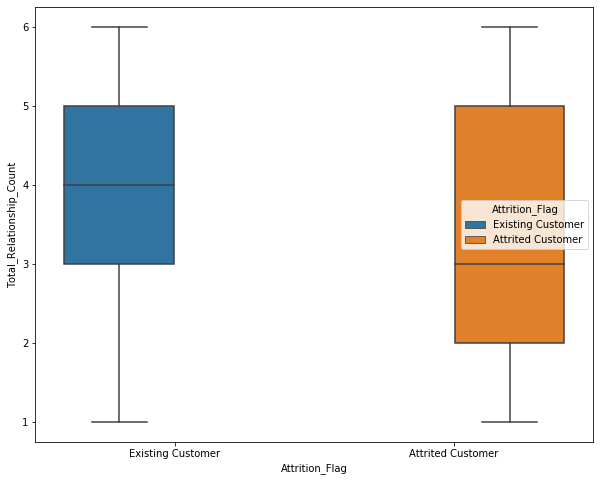

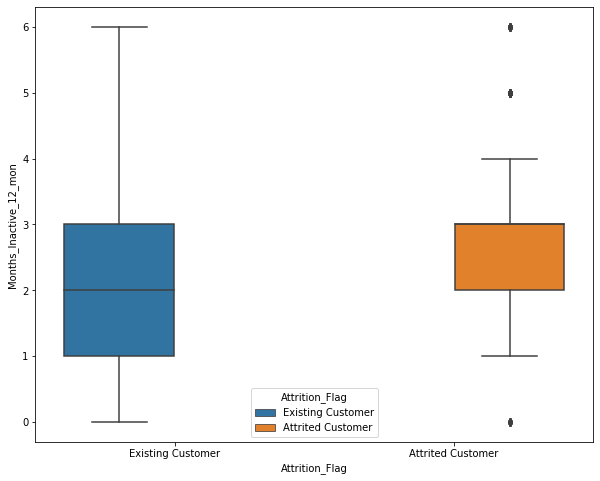

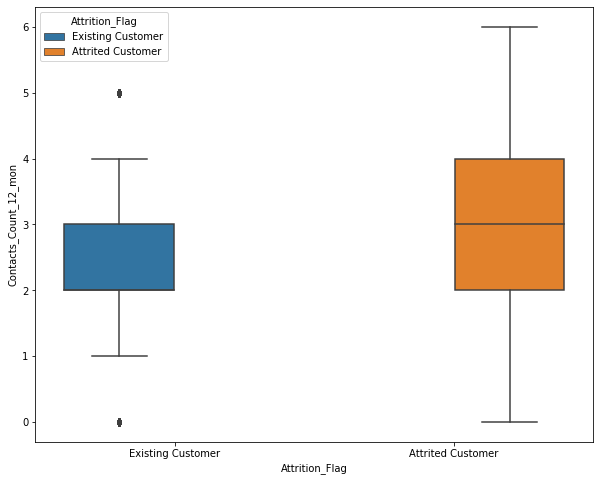

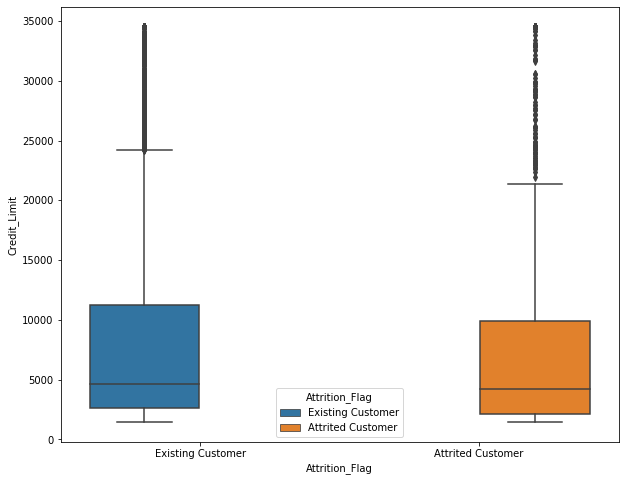

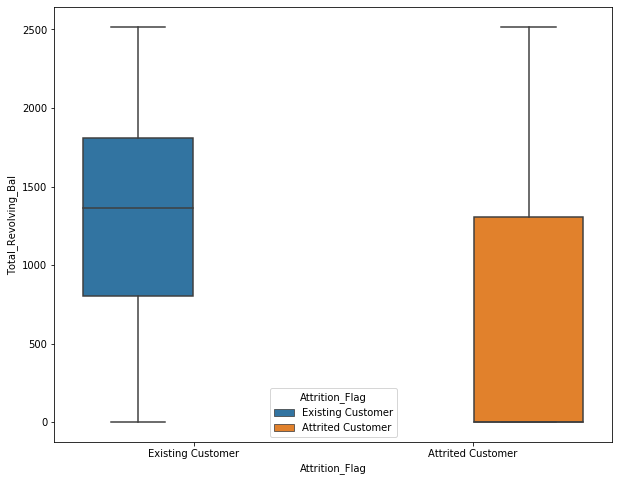

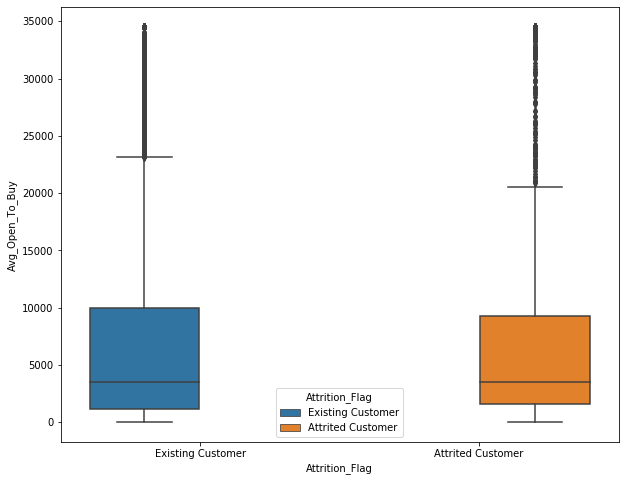

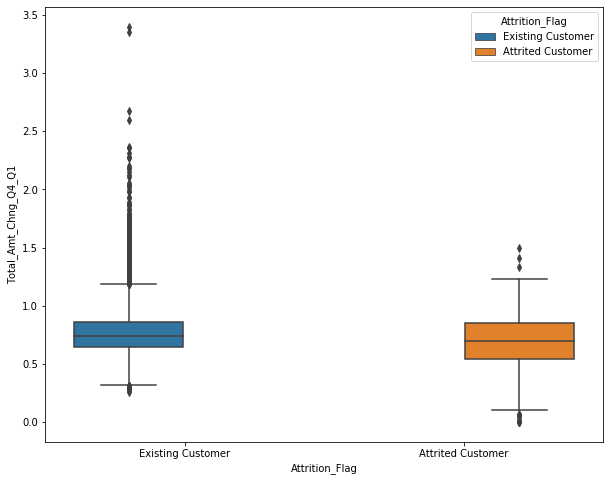

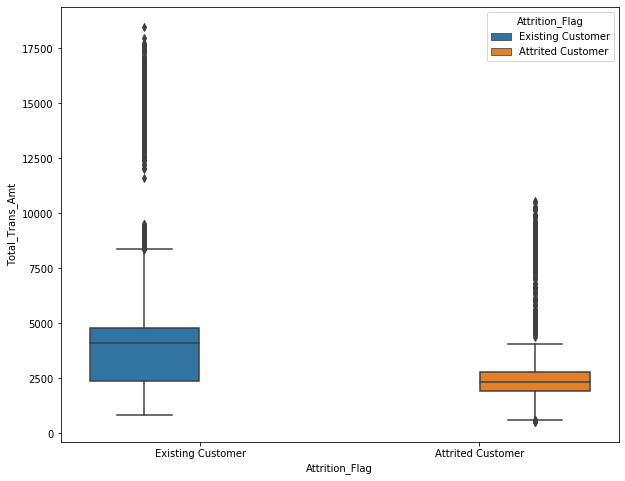

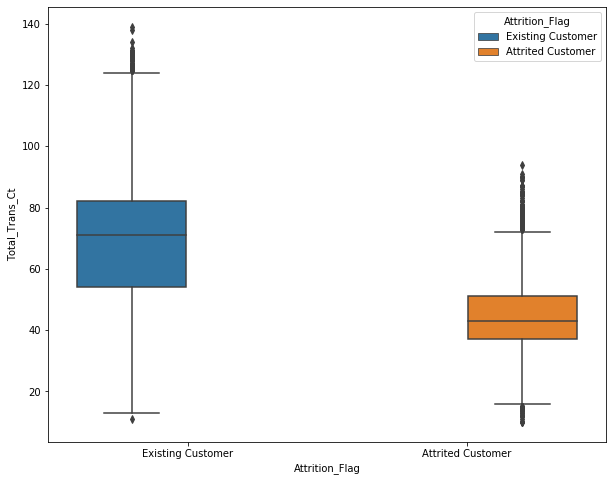

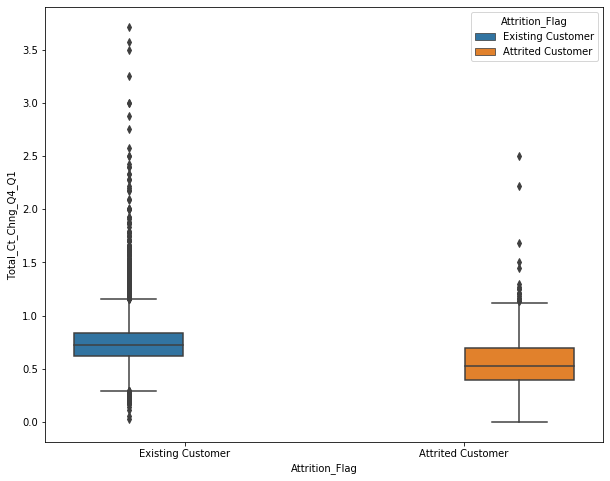

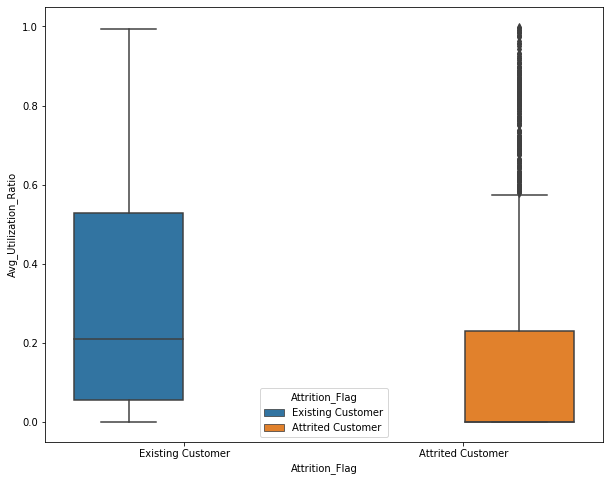

In [28]:
for col in numerical_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=data, x=y, y=f'{col}', hue=y)

In [8]:
attrited_client = data[data[target] == "Attrited Customer"]
existing_client = data[data[target] == "Existing Customer"]

In [52]:
existing_client.shape

(8500, 20)

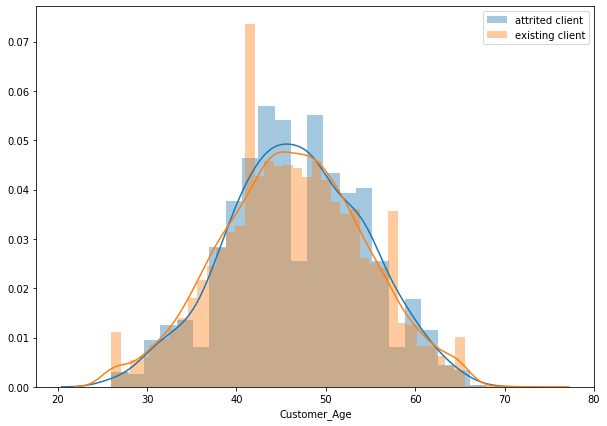

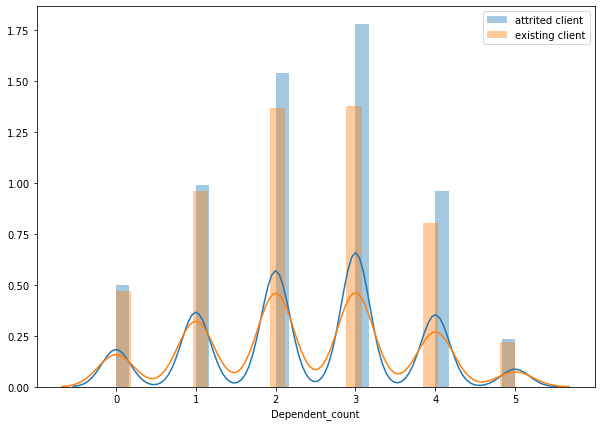

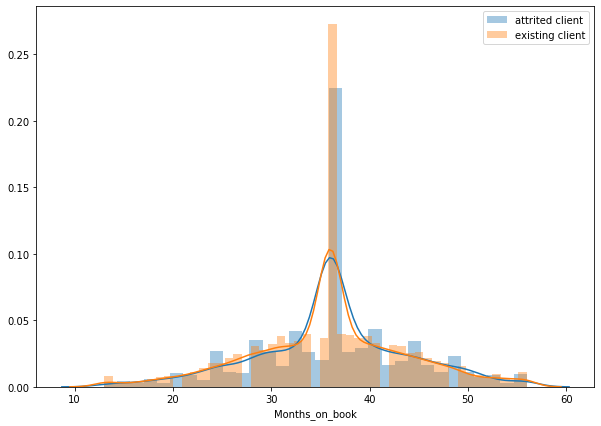

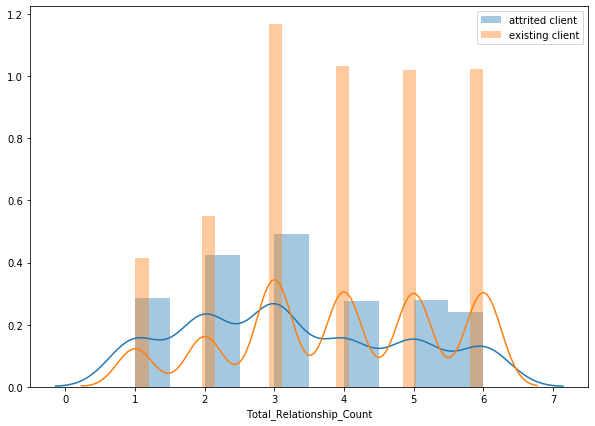

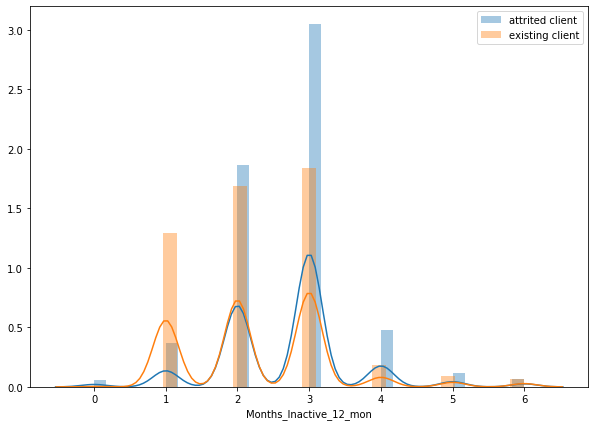

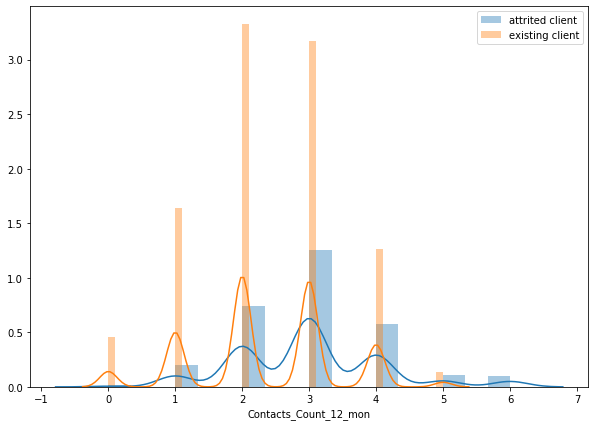

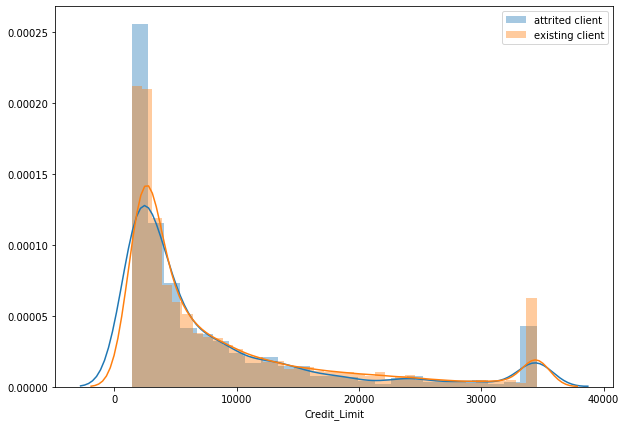

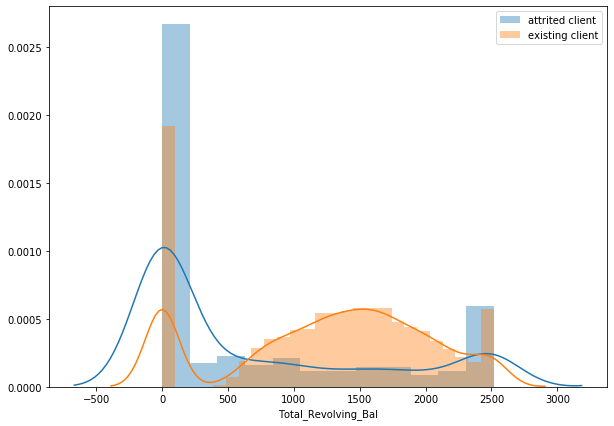

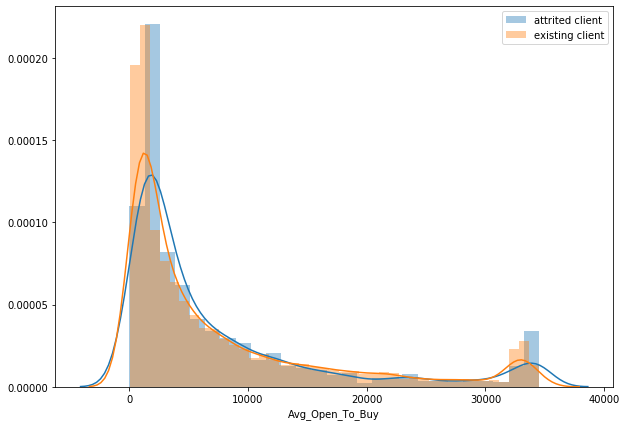

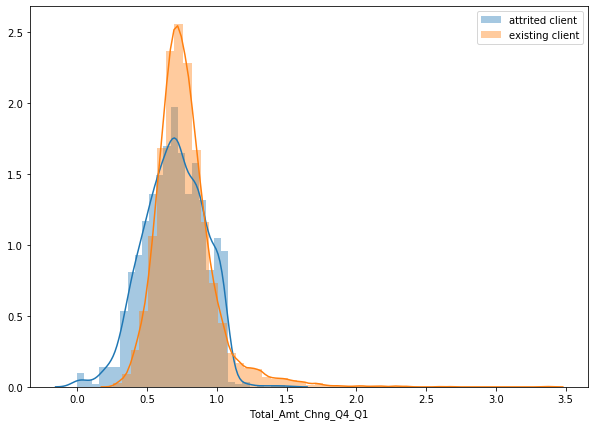

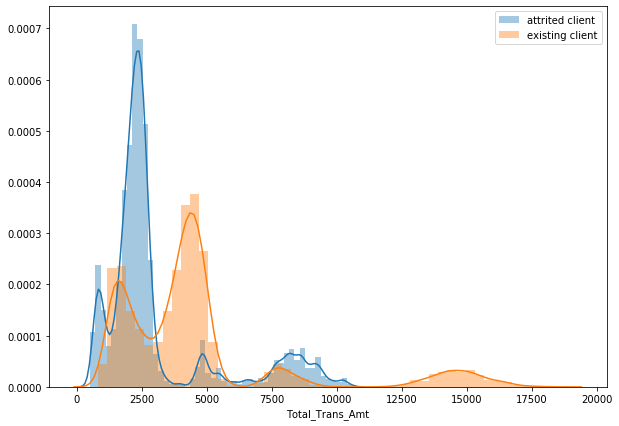

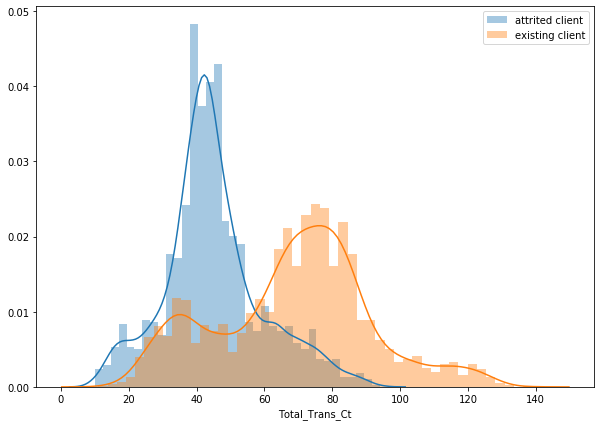

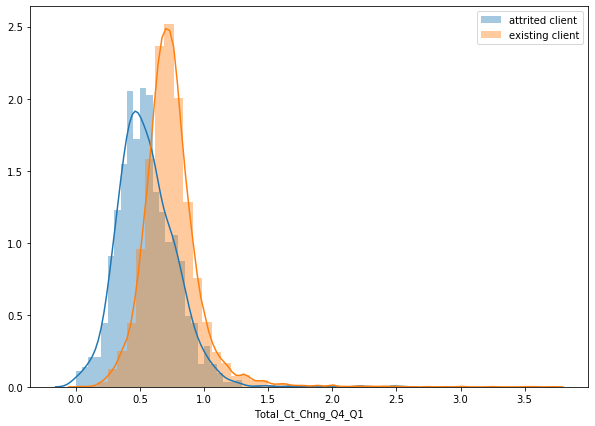

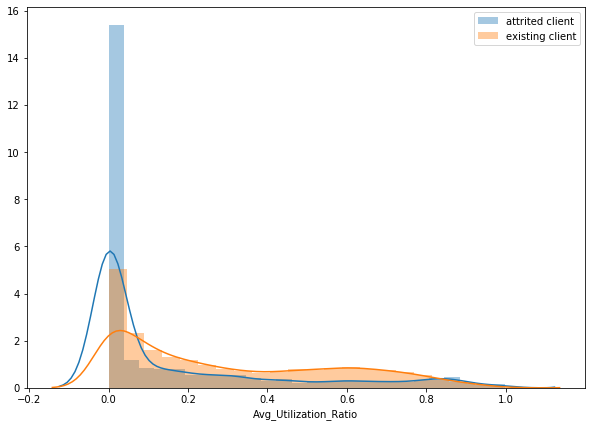

In [54]:
for col in numerical_features:
    plt.figure(figsize=(10,7))
    sns.distplot(attrited_client[col], label="attrited client")
    sns.distplot(existing_client[col], label="existing client")
    plt.legend()

## Hypothèse H0 à verifier avec un test statistique

- on peut observer que les variables: total_ct_chng_Q4_Q1, Total_trans_ct, Total_Trans_Amt et total_Amt_chng_Q4_Q1, Total_Revolving_Bal  semblent être liés au desabonnement d'un client

In [55]:
from scipy.stats import ttest_ind

In [86]:
def t_test(col):
    alpha = 0.08
    stat, p = ttest_ind(existing_client.sample(attrited_client.shape[0])[col], attrited_client[col])
    if p < alpha:
        return 'HO rejété'
    else:
        return 0

In [88]:
for col in numerical_features:
    print(f'{col}------------------------------------------------{t_test(col)}')

Customer_Age------------------------------------------------HO rejété
Dependent_count------------------------------------------------0
Months_on_book------------------------------------------------0
Total_Relationship_Count------------------------------------------------HO rejété
Months_Inactive_12_mon------------------------------------------------HO rejété
Contacts_Count_12_mon------------------------------------------------HO rejété
Credit_Limit------------------------------------------------HO rejété
Total_Revolving_Bal------------------------------------------------HO rejété
Avg_Open_To_Buy------------------------------------------------0
Total_Amt_Chng_Q4_Q1------------------------------------------------HO rejété
Total_Trans_Amt------------------------------------------------HO rejété
Total_Trans_Ct------------------------------------------------HO rejété
Total_Ct_Chng_Q4_Q1------------------------------------------------HO rejété
Avg_Utilization_Ratio---------------------------

### Remarque
- Ce test confirme que les variables citées plus haut sont liées à la decision de se desabonné à la banque

## Visualisation variables / variables

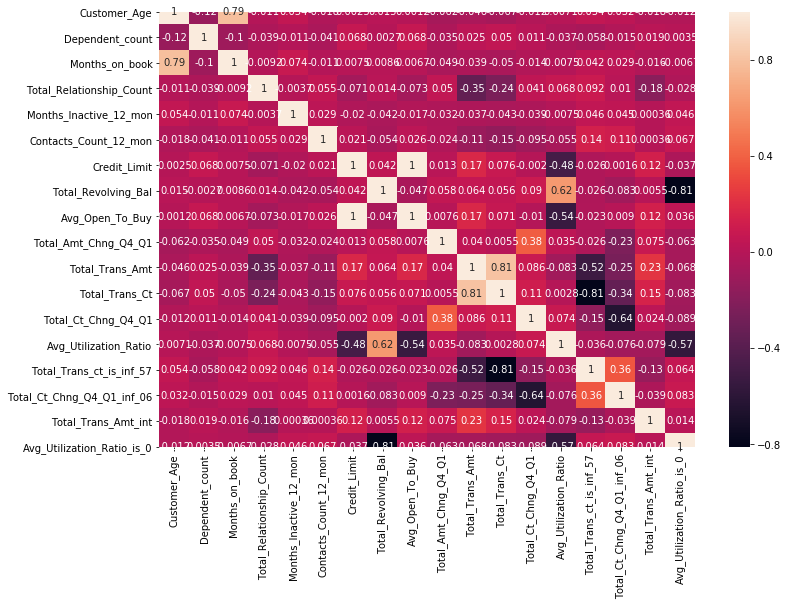

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

## Features ingenering

In [52]:
data["Total_Trans_ct_is_inf_57"] = data['Total_Trans_Ct'] < 53
data['Total_Ct_Chng_Q4_Q1_inf_06'] = data['Total_Ct_Chng_Q4_Q1'] < 0.6
data['Total_Trans_Amt_int'] = (data['Total_Trans_Amt'] < 10500) & (data['Total_Trans_Amt'] >= 8000)
data['Avg_Utilization_Ratio_is_0'] = data['Avg_Utilization_Ratio'] == 0

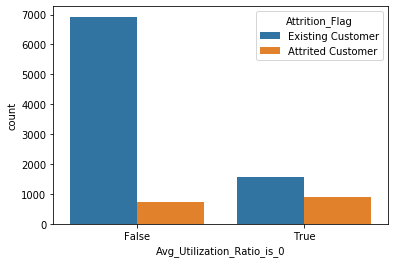

In [53]:
sns.countplot(data=data, x='Avg_Utilization_Ratio_is_0', hue=target)

## Preprocessing

In [23]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import make_column_transformer

In [56]:
y = data.Attrition_Flag
X = data.drop('Attrition_Flag', axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
numerical_features = X_train.select_dtypes([np.number]).columns
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns

In [15]:
numerical_features

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [16]:
numerical_piline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [59]:
transformer = make_column_transformer((numerical_piline, numerical_features),
                                     (categorical_pipeline, categorical_features))

# selection de variable avec select k best 

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

### La selection des variables faites n'a pas produit de bon resultat

# Modeling

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = make_pipeline(transformer, DecisionTreeClassifier())

In [30]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(10,8))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4)
    plt.plot(N, train_score.mean(axis=1), label="Train scrore")
    plt.plot(N, val_score.mean(axis=1), label='Val Score')
    plt.legend()

In [25]:
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=0),
    'XGBClassifier': XGBClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=0)
}

RandomForestClassifier
[[ 248   61]
 [  43 1674]]
                   precision    recall  f1-score   support

Attrited Customer       0.85      0.80      0.83       309
Existing Customer       0.96      0.97      0.97      1717

         accuracy                           0.95      2026
        macro avg       0.91      0.89      0.90      2026
     weighted avg       0.95      0.95      0.95      2026

XGBClassifier
[[ 276   33]
 [  15 1702]]
                   precision    recall  f1-score   support

Attrited Customer       0.95      0.89      0.92       309
Existing Customer       0.98      0.99      0.99      1717

         accuracy                           0.98      2026
        macro avg       0.96      0.94      0.95      2026
     weighted avg       0.98      0.98      0.98      2026

DecisionTreeClassifier
[[ 240   69]
 [  71 1646]]
                   precision    recall  f1-score   support

Attrited Customer       0.77      0.78      0.77       309
Existing Customer       0.

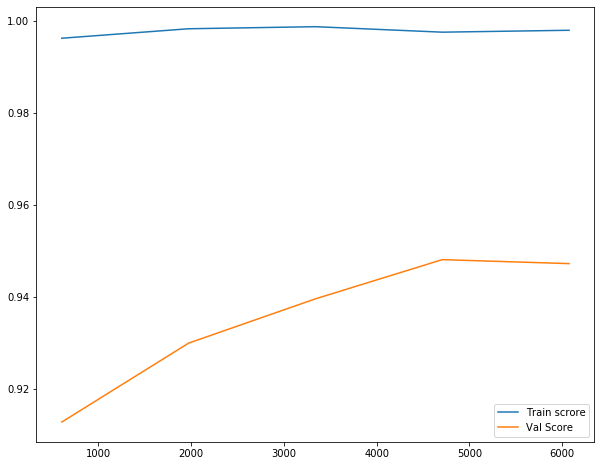

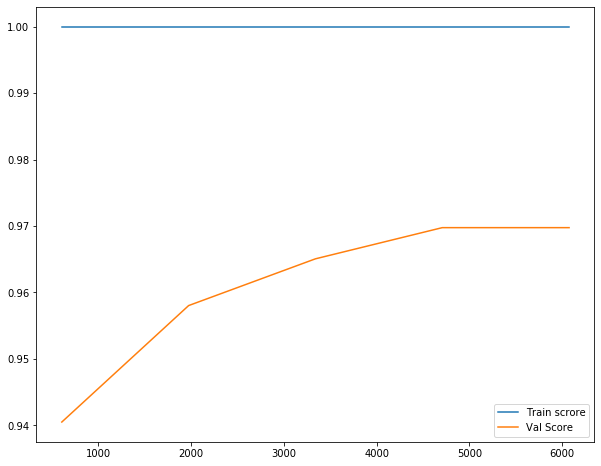

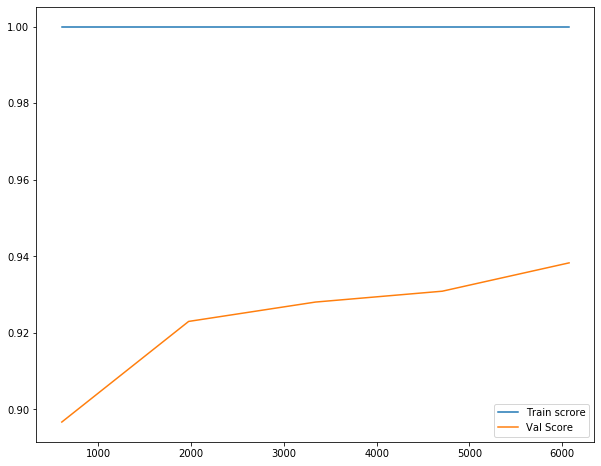

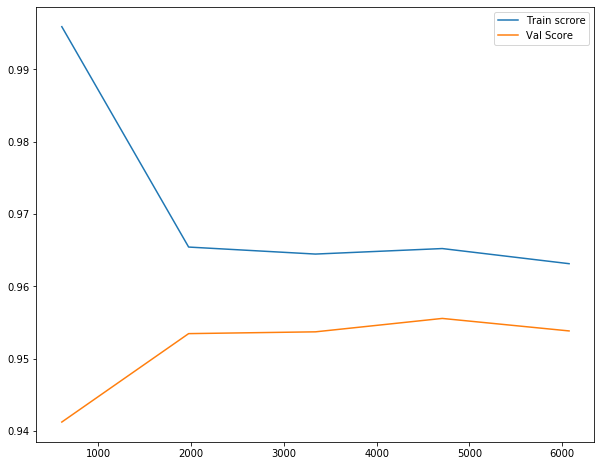

In [75]:
for name, m in models.items():
    model = make_pipeline(transformer, m)
    print(name)
    evaluation(model)

## Select Model
- c'est le xgbclassier qui donne des meilleur resultat
- on va utiliser GridSearch Cv pour chercher de l'optimiser

In [78]:
model = make_pipeline(transformer, XGBClassifier())

In [83]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'xgbclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__standardscaler', 'columntransformer__pipeline-1__standardscaler__copy', 'columntransformer__pipeline-1__standardscaler__with_mean', 'columntransformer__pipeline-1__standardscaler__with_std', 'columntransformer__pipeline-2__memory', 'columntransformer__pipeline-2__steps', 'columntransformer__pipeline-2__verbose', 'columntransformer__pipeline-2__onehotencoder', 'columntransformer__pipeline-2__onehotencoder__categorical_features', 'columntransformer__pipeline-2__onehotencoder__categories', '

In [80]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__learning_rate': [0.01, 0.02, 0.05],
}
grid = GridSearchCV(model, param_grid=params, cv=4)

In [86]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('standardscaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
    

In [88]:
grid.best_params_

{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 300}

In [89]:
grid.best_score_

0.9713615603011974

In [90]:
y_pred = grid.predict(X_test)

In [91]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 271   38]
 [  14 1703]]
                   precision    recall  f1-score   support

Attrited Customer       0.95      0.88      0.91       309
Existing Customer       0.98      0.99      0.98      1717

         accuracy                           0.97      2026
        macro avg       0.96      0.93      0.95      2026
     weighted avg       0.97      0.97      0.97      2026

